# <center> Feature Selection </center>
- linear SVM
- Random Foreast
- [RFE](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE)  (Recursive feature elimination)
   > Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features
- [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) (Principal component analysis)

## prepocessing

## breast cancer dataset

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

iris = datasets.load_breast_cancer()
X = iris.data[:, :]
y = iris.target

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#特徵縮放
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from sklearn.svm import SVC
from numpy import stack

linear_svm = SVC(kernel='linear') 
linear_svm.fit(X_train_std,Y_train)
y_pred = linear_svm.predict(X_test_std)
print("Accuracy: %.2f" % accuracy_score(Y_test,y_pred))

coef = linear_svm.coef_[0]
coef = np.absolute(coef)
svm_indices = np.argsort(coef)[::-1]

for f in range(X_train.shape[1]):
    print(("%2d) %-*s %f" % (f+1,30,svm_indices[f],coef[svm_indices[f]])))

Accuracy: 0.96
 1) 19                             1.014021
 2) 29                             0.995842
 3) 10                             0.961654
 4) 13                             0.861049
 5) 23                             0.786111
 6) 15                             0.718461
 7) 12                             0.709576
 8) 26                             0.681310
 9) 21                             0.664996
10) 20                             0.547090
11) 22                             0.501465
12) 27                             0.479518
13) 17                             0.421920
14) 8                              0.411808
15) 11                             0.344699
16) 6                              0.335487
17) 7                              0.334262
18) 25                             0.331577
19) 16                             0.286189
20) 14                             0.258193
21) 5                              0.252170
22) 1                              0.251975
23) 3            

In [4]:
# compare (前 5 個feature)
X_train_RD = np.array(X_train_std[:,svm_indices[0]])
X_test_RD = np.array(X_test_std[:,svm_indices[0]])

linear_svm_select = SVC(kernel='linear')
for i in svm_indices[1:10]:
    X_train_RD = np.vstack([X_train_RD,X_train_std[:,i]]) 
    X_test_RD = np.vstack([X_test_RD,X_test_std[:,i]])
    
X_train_RD = X_train_RD.T
X_test_RD = X_test_RD.T
linear_svm_select.fit(X_train_RD,Y_train)
y_pred = linear_svm_select.predict(X_test_RD)

print("Accuracy(After): %.2f" % accuracy_score(Y_test,y_pred))


Accuracy(After): 0.94


## Wine

In [60]:
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

wine = pd.read_csv('wine.csv',header = None)
feat_labels = ['Class Label','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids',
               'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

wine.columns = feat_labels
labels_name = feat_labels[1:]

# print wine.head()
print(np.unique(wine['Class Label']))

y = wine.iloc[:,0]
x = wine.iloc[:,1::]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#特徵縮放
sc = StandardScaler()
sc.fit(X_train)
x_std = sc.transform(x)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

[1 2]


## linear SVM

In [61]:
from sklearn.svm import SVC
from numpy import stack
from sklearn.metrics import accuracy_score

linear_svm = SVC(kernel='linear') 
linear_svm.fit(X_train_std,Y_train)
y_pred = linear_svm.predict(X_test_std)
print("Accuracy: %.2f" % accuracy_score(Y_test,y_pred))

coef = linear_svm.coef_[0]
coef = np.absolute(coef)
svm_indices = np.argsort(coef)[::-1]

for f in range(X_train.shape[1]):
    print(("%2d) %-*s %f" % (f+1,30,labels_name[svm_indices[f]],coef[svm_indices[f]])))

Accuracy: 0.95
 1) Proline                        0.919534
 2) Alcohol                        0.905591
 3) Alcalinity of ash              0.524910
 4) Proanthocyanins                0.518454
 5) Ash                            0.398836
 6) Magnesium                      0.335927
 7) Flavanoids                     0.324428
 8) OD280/OD315 of diluted wines   0.221005
 9) Malic acid                     0.207241
10) Hue                            0.180858
11) Color intensity                0.140022
12) Total phenols                  0.121156
13) Nonflavanoid phenols           0.045654


In [62]:
svm_indices

array([12,  0,  3,  8,  2,  4,  6, 11,  1, 10,  9,  5,  7], dtype=int64)

In [63]:
# compare (前 5 個feature)
X_train_RD = np.array(X_train_std[:,svm_indices[0]])
X_test_RD = np.array(X_test_std[:,svm_indices[0]])

linear_svm_select = SVC(kernel='linear')
for i in svm_indices[1:5]:
    X_train_RD = np.vstack([X_train_RD,X_train_std[:,i]]) 
    X_test_RD = np.vstack([X_test_RD,X_test_std[:,i]])
    print(i)
    
X_train_RD = X_train_RD.T
X_test_RD = X_test_RD.T
linear_svm_select.fit(X_train_RD,Y_train)
y_pred = linear_svm_select.predict(X_test_RD)

print("Accuracy(After): %.2f" % accuracy_score(Y_test,y_pred))

0
3
8
2
Accuracy(After): 0.97


In [64]:
# compare (6~10個feature)
X_train_RD = np.array(X_train_std[:,svm_indices[5]])
X_test_RD = np.array(X_test_std[:,svm_indices[5]])

linear_svm_select = SVC(kernel='linear')
for i in svm_indices[6:10]:
    X_train_RD = np.vstack([X_train_RD,X_train_std[:,i]]) 
    X_test_RD = np.vstack([X_test_RD,X_test_std[:,i]]) 
    
X_train_RD = X_train_RD.T
X_test_RD = X_test_RD.T
linear_svm_select.fit(X_train_RD,Y_train)
y_pred = linear_svm_select.predict(X_test_RD)

print("Accuracy(After): %.2f" % accuracy_score(Y_test,y_pred))

Accuracy(After): 0.87


## Random Foreast

In [65]:
from sklearn.ensemble import RandomForestClassifier
from numpy import stack
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=100, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train,Y_train)
y_pred = forest.predict(X_test)
print("Accuracy: %.2f" % accuracy_score(Y_test,y_pred))

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print(("%2d) %-*s %f" % (f+1,30,labels_name[indices[f]],importances[indices[f]])))

Accuracy: 0.97
 1) Proline                        0.301492
 2) Alcohol                        0.235568
 3) Color intensity                0.131030
 4) Flavanoids                     0.107489
 5) Magnesium                      0.075796
 6) Total phenols                  0.038733
 7) Alcalinity of ash              0.037979
 8) OD280/OD315 of diluted wines   0.022443
 9) Malic acid                     0.014366
10) Nonflavanoid phenols           0.013879
11) Ash                            0.007612
12) Proanthocyanins                0.007053
13) Hue                            0.006561


In [66]:
X_train_RD = np.array(X_train.iloc[:,indices[0]])
X_test_RD = np.array(X_test.iloc[:,indices[0]])

forest_select = RandomForestClassifier(criterion='entropy',
                                        n_estimators=100, 
                                        random_state=1,
                                        n_jobs=2)
for i in indices[1:5]:
    X_train_RD = np.vstack([X_train_RD,X_train.iloc[:,i]]) 
    X_test_RD = np.vstack([X_test_RD,X_test.iloc[:,i]]) 
    
X_train_RD = X_train_RD.T
X_test_RD = X_test_RD.T

forest_select.fit(X_train_RD,Y_train)
y_pred = forest_select.predict(X_test_RD)

print("Accuracy(After): %.2f" % accuracy_score(Y_test,y_pred))

Accuracy(After): 0.97


## RFE

In [67]:
from sklearn.feature_selection import RFE
from numpy import stack
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train_std,Y_train)
y_pred = linear_svm.predict(X_test_std)
print("Accuracy: %.2f" % accuracy_score(Y_test,y_pred))

rfe = RFE(linear_svm,5)
rfe = rfe.fit(X_train_std,Y_train)

support = rfe.support_
print(support)
rank = rfe.ranking_
print(rank)
print(rfe.score(X_train_std,Y_train))
RFE_index = np.argsort(rank)

for f in range(len(RFE_index)):
    print(("%2d) %-*s " % (f+1,30,labels_name[RFE_index[f]])))

Accuracy: 0.95
[ True False  True  True False False False False False False False  True
  True]
[1 5 1 1 4 6 3 9 2 8 7 1 1]
1.0
 1) Alcohol                        
 2) Ash                            
 3) Alcalinity of ash              
 4) OD280/OD315 of diluted wines   
 5) Proline                        
 6) Proanthocyanins                
 7) Flavanoids                     
 8) Magnesium                      
 9) Malic acid                     
10) Total phenols                  
11) Hue                            
12) Color intensity                
13) Nonflavanoid phenols           


In [68]:
X_train_RD = np.array(X_train_std[:,RFE_index[0]])
X_test_RD = np.array(X_test_std[:,RFE_index[0]])

linear_svm_select = SVC(kernel='linear') 
for i in RFE_index[1:5]:
    X_train_RD = np.vstack([X_train_RD,X_train_std[:,i]]) 
    X_test_RD = np.vstack([X_test_RD,X_test_std[:,i]]) 
    
X_train_RD = X_train_RD.T
X_test_RD = X_test_RD.T
linear_svm_select.fit(X_train_RD,Y_train)
y_pred = linear_svm_select.predict(X_test_RD)

print("Accuracy(After): %.2f" % accuracy_score(Y_test,y_pred))

Accuracy(After): 1.00


In [69]:
# compare (6~10個feature)
X_train_RD = np.array(X_train_std[:,RFE_index[5]])
X_test_RD = np.array(X_test_std[:,RFE_index[5]])

linear_svm_select = SVC(kernel='linear')
for i in RFE_index[6:10]:
    X_train_RD = np.vstack([X_train_RD,X_train_std[:,i]]) 
    X_test_RD = np.vstack([X_test_RD,X_test_std[:,i]]) 
    
X_train_RD = X_train_RD.T
X_test_RD = X_test_RD.T
linear_svm_select.fit(X_train_RD,Y_train)
y_pred = linear_svm_select.predict(X_test_RD)

print("Accuracy(After): %.2f" % accuracy_score(Y_test,y_pred))

Accuracy(After): 0.85


### SelectKBest + chi2

In [70]:
from sklearn.feature_selection import SelectKBest ,chi2
#根據chi2檢測，找到前K個跟label最相關的features
X_best = SelectKBest(chi2, k=5).fit(X_train, Y_train)
scores = X_best.scores_
support = X_best.get_support()
chi2_index = np.argsort(support)[::-1]
print(scores)
print(support)
print(chi2_index)
for f in range(len(chi2_index)):
    print(("%2d) %-*s " % (f+1,30,labels_name[chi2_index[f]])))

[  3.82683075e+00   1.54932237e-03   3.21322585e-01   1.48885301e+01
   3.80963643e+01   2.98310312e+00   7.15402663e+00   4.81713889e-01
   4.90092925e-01   3.41729739e+01   2.05190731e-03   1.11577632e+00
   9.99649945e+03]
[False False False  True  True False  True False False  True False False
  True]
[12  9  6  4  3 11 10  8  7  5  2  1  0]
 1) Proline                        
 2) Color intensity                
 3) Flavanoids                     
 4) Magnesium                      
 5) Alcalinity of ash              
 6) OD280/OD315 of diluted wines   
 7) Hue                            
 8) Proanthocyanins                
 9) Nonflavanoid phenols           
10) Total phenols                  
11) Ash                            
12) Malic acid                     
13) Alcohol                        


In [71]:
X_train_RD = np.array(X_train_std[:,chi2_index[0]])
X_test_RD = np.array(X_test_std[:,chi2_index[0]])

linear_svm_select = SVC(kernel='linear')
for i in chi2_index[1:5]:
    X_train_RD = np.vstack([X_train_RD,X_train_std[:,i]]) 
    X_test_RD = np.vstack([X_test_RD,X_test_std[:,i]]) 
    
X_train_RD = X_train_RD.T
X_test_RD = X_test_RD.T
linear_svm_select.fit(X_train_RD,Y_train)
y_pred = linear_svm_select.predict(X_test_RD)

print("Accuracy(After): %.2f" % accuracy_score(Y_test,y_pred))

Accuracy(After): 0.95


### VarianceThreshold

In [72]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train_std,Y_train)
y_pred = linear_svm.predict(X_test_std)
print("Accuracy: %.2f" % accuracy_score(Y_test,y_pred))

Accuracy: 0.95


In [73]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=.9)
X_sel=sel.fit(X_train)
variances = X_sel.variances_
print(variances)
support = X_sel.get_support()
print(support)
variance_index = np.argsort(support)[::-1]
for f in range(len(variance_index)):
    print(("%2d) %-*s " % (f+1,30,labels_name[variance_index[f]])))

[  7.71953967e-01   9.33713078e-01   7.31078614e-02   1.00959763e+01
   2.20444149e+02   2.79795604e-01   4.45461369e-01   1.13174737e-02
   2.69294650e-01   2.71953250e+00   3.26502548e-02   2.04818669e-01
   1.22643692e+05]
[False  True False  True  True False False False False  True False False
  True]
 1) Proline                        
 2) Color intensity                
 3) Magnesium                      
 4) Alcalinity of ash              
 5) Malic acid                     
 6) OD280/OD315 of diluted wines   
 7) Hue                            
 8) Proanthocyanins                
 9) Nonflavanoid phenols           
10) Flavanoids                     
11) Total phenols                  
12) Ash                            
13) Alcohol                        


In [74]:
X_train_RD = np.array(X_train_std[:,variance_index[0]])
X_test_RD = np.array(X_test_std[:,variance_index[0]])

linear_svm_select = SVC(kernel='linear')
for i in variance_index[1:5]:
    X_train_RD = np.vstack([X_train_RD,X_train_std[:,i]]) 
    X_test_RD = np.vstack([X_test_RD,X_test_std[:,i]]) 
    
X_train_RD = X_train_RD.T
X_test_RD = X_test_RD.T
linear_svm_select.fit(X_train_RD,Y_train)
y_pred = linear_svm_select.predict(X_test_RD)

print("Accuracy(After): %.2f" % accuracy_score(Y_test,y_pred))

Accuracy(After): 0.97


In [75]:
X_train_RD = np.array(X_train_std[:,variance_index[5]])
X_test_RD = np.array(X_test_std[:,variance_index[5]])

linear_svm_select = SVC(kernel='linear')
for i in variance_index[6:10]:
    X_train_RD = np.vstack([X_train_RD,X_train_std[:,i]]) 
    X_test_RD = np.vstack([X_test_RD,X_test_std[:,i]]) 
    
X_train_RD = X_train_RD.T
X_test_RD = X_test_RD.T
linear_svm_select.fit(X_train_RD,Y_train)
y_pred = linear_svm_select.predict(X_test_RD)

print("Accuracy(After): %.2f" % accuracy_score(Y_test,y_pred))

Accuracy(After): 0.82


## PCA

In [76]:
from sklearn import decomposition
from sklearn.svm import SVC
from numpy import stack
from sklearn.metrics import accuracy_score

linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train_std,Y_train)
y_pred = linear_svm.predict(X_test_std)
print("Accuracy: %.2f" % accuracy_score(Y_test,y_pred))

Accuracy: 0.95


In [86]:
pca = decomposition.PCA(n_components=5)
pca.fit(x_std)
pca_x = pca.transform(x_std)

pcaX_train, pcaX_test, pcaY_train, pcaY_test = train_test_split(pca_x, y, test_size=0.3, random_state=0)

svm = SVC(kernel='linear')
svm.fit(pcaX_train,pcaY_train)
y_pred = svm.predict(pcaX_test)

print("Accuracy(After): %.2f" % accuracy_score(pcaY_test,y_pred))

Accuracy(After): 0.97


## PCA 應用

(150, 4)


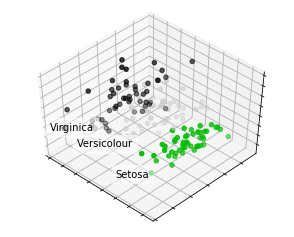

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X.shape)

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()